# 6.2. Using k-fold cross-validation to assess model performance

## Source
New part
* [Streamlining workflows with pipelines](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Streamlining-workflows-with-pipelines)

Related Parts
* [Using k-fold cross-validation to assess model performance](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Using-k-fold-cross-validation-to-assess-model-performance)


## Summary
* Problem: Binary classification with class 0 (B or Benign) & class 1 (M or Malignant)
* Dataset: Breast Cancer Wisconsin Dataset
* Classifier: LogisticRegression with liblinear

K-fold cross-validation is used to assess the model performance. In this example, the dataset is divided into 10 folds. One fold is used to validate the performance and the rest is used to train the model. Each of 10 folds are selected for 10 set of training and validation.

K-fold cross-validation method is compared to the holdoud method in the following figures. For details, read [Using k-fold cross-validation to assess model performance](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Using-k-fold-cross-validation-to-assess-model-performance).

1. The Holdout Method
<img src='images/6_2-the_holdout_method.png'>

2. K-fold Cross-Validation
<img src='images/6_2-k-fold_cross-validation_method.png'>

## Code

## Load the data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Fetch the dataset
url2breast_cancer_wisconsin_dataset='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
url2dataset = url2breast_cancer_wisconsin_dataset
df = pd.read_csv( url2dataset, header=None)

# Get the actual data & label from the dataset
X = df.loc[:, 2:].values # actual data
y = df.loc[:, 1].values  # label

# Encode B to 0 and M to 1
le = LabelEncoder()
y = le.fit_transform(y)

# Split to train & test data
test_over_train_ratio = 0.2
random_seed = 1
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_over_train_ratio, stratify=y, random_state=random_seed )

In [32]:
print(f"{X_train.shape} {X_test.shape}" )

(455, 30) (114, 30)


## Pipeline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Set up the classifier with pipeline
pipe_lr = make_pipeline( StandardScaler(),
                         PCA(n_components=2),
                         LogisticRegression(solver='liblinear',random_state=random_seed)
                       )

## K-fold Cross Validation

In [38]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold( n_splits=10, random_state=1).split( X_train, y_train )
list_accuracy = []

In [39]:
for k, (index_train, index_test) in enumerate(kfold):
    # Select the k-th data from the indices.
    X_train_k, y_train_k = X_train[index_train], y_train[index_train]
    X_valid_k, y_valid_k = X_train[index_test], y_train[index_test]

    # Train and evaluate with the selected k-th dataset
    pipe_lr.fit( X_train_k, y_train_k )
    accuracy = pipe_lr.score( X_valid_k, y_valid_k )
    list_accuracy.append( accuracy )
    
    distribution = np.bincount( y_train_k )
    print( 'fold %2d, class distribution %s, accuracy %.3f' % (k+1, distribution, accuracy))

fold  1, class distribution [256 153], accuracy 0.935
fold  2, class distribution [256 153], accuracy 0.935
fold  3, class distribution [256 153], accuracy 0.957
fold  4, class distribution [256 153], accuracy 0.957
fold  5, class distribution [256 153], accuracy 0.935
fold  6, class distribution [257 153], accuracy 0.956
fold  7, class distribution [257 153], accuracy 0.978
fold  8, class distribution [257 153], accuracy 0.933
fold  9, class distribution [257 153], accuracy 0.956
fold 10, class distribution [257 153], accuracy 0.956


In [40]:
mean_accuracy = np.mean( list_accuracy )
std_accuracy = np.std( list_accuracy)
print( 'Accuracy of k-fold cross validation = %.3f +/- %.3f' % (mean_accuracy, std_accuracy) )

Accuracy of k-fold cross validation = 0.950 +/- 0.014


The following part is done by me. The accuracy is depicted by matplotlib.

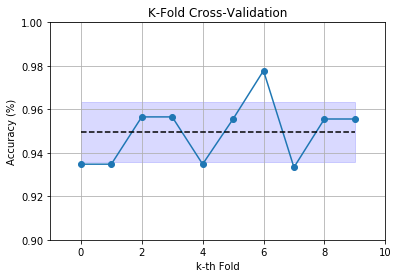

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

num_validations = len( list_accuracy )
xs = range(num_validations)  # Xs or plural of x

# Plot each accuracy
plt.plot( xs, list_accuracy, 'o-' )
plt.grid()
plt.axis([-1, 10, 0.9, 1.0])
plt.title('K-Fold Cross-Validation')
plt.xlabel('k-th Fold')
plt.ylabel('Accuracy (%)')

# Plot the mean and standard deviation of accuracy
# color='black', marker='--'
ys_mean = mean_accuracy*np.ones(num_validations)
ys_upper_bound = ( mean_accuracy+std_accuracy )*np.ones(num_validations)
ys_lower_bound = ( mean_accuracy-std_accuracy )*np.ones(num_validations)
plt.plot( xs, ys_mean, 'k--')
plt.fill_between( xs, ys_upper_bound, ys_lower_bound, alpha=0.15, color='blue')

## cross_val_score: Sklearn's Built-in Cross Validation Tool

In [75]:
from sklearn.model_selection import cross_val_score

list_accuracy = cross_val_score( estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1 )
mean_accuracy = np.mean(list_accuracy)
std_accuracy = np.std( list_accuracy)

print( 'Accuracy of k-fold cross validation:' )
print(f'{list_accuracy}' )
print( '%.3f +/- %.3f' % (mean_accuracy, std_accuracy) )

Accuracy of k-fold cross validation:
[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
0.950 +/- 0.014
